In [1]:
from scipy.optimize import fsolve
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
def func_r(Mr, Ms):
    g = 1.4
    return [- Mr[0]/(Mr[0]**2 - 1) + Ms/(Ms**2 -1) * (1 + 2*(g - 1)/(g + 1)**2 * (Ms**2 - 1) * (g + 1/(Ms**2)))**0.5]

In [62]:
def func(M, p_rapport):
    g1 = 1.4
    g4 = g1
    T1 = 293
    T4 = T1
    c1 = (g1*0.287*T1)**0.5
    c4 = (g4*0.287*T4)**0.5
    return [-p_rapport + (1 + (2 * g1)/(g4 + 1) * (M[0]**2 - 1)) * (1 - (g1-1)/(g4 + 1) * (c4/c1) * (M[0]**2-1)/M[0])**((-2 * g1)/(g1 -1))]

In [5]:
fsolve(func_r, [2], args = 2.5)

array([1.94935887])

In [48]:
df = pd.read_csv('datasbis.csv', delimiter = ';', decimal=',')  
df = df.drop(df.index[9])

In [49]:
df

,Pression (mBar),Tension (mV),T1 en µs,T2 en µs,TR2 en µs,TR1 en µs,Us,Ur,Ms,racine(T3/T0),a3,M3,u3/choc,u3/tube,MR
0,16.82262,2.8,194,348,536,890,649.350649,282.485876,1.909855,1.271065,432.161939,0.594,256.704192,392.646458,1.562221
1,27.32476,3.9,113,270,458,780,636.942675,310.559006,1.873361,1.259868,428.355221,0.601,257.441488,379.501187,1.610953
2,36.87216,4.9,136,298,488,798,617.283951,322.580645,1.815541,1.242270,422.371686,0.613,258.913843,358.370107,1.612207
3,40.69112,5.3,102,270,446,756,595.238095,322.580645,1.750700,1.222740,415.731450,0.628,261.079351,334.158745,1.579720
4,48.32904,6.1,122,286,430,810,609.756098,263.157895,1.793400,1.235577,420.096120,0.618,259.619402,350.136695,1.459891
5,56.92170,7.0,488,672,862,1198,543.478261,297.619048,1.598465,1.177672,400.408311,0.669,267.873160,275.605101,1.431599
6,66.46910,8.0,113,285,379,789,581.395349,243.902439,1.709986,1.210583,411.598275,0.638,262.599699,318.795650,1.367105
7,76.97124,9.1,96,272,332,764,568.181818,231.481482,1.671123,1.199052,407.677784,0.648,264.175204,304.006614,1.313508
8,85.56390,10.0,282,460,548,872,561.797753,308.641975,1.652346,1.193506,405.791909,0.653,264.982116,296.815636,1.492040
10,56.92170,7.0,800,978,1072,1492,561.797753,238.095238,1.652346,1.193506,405.791909,0.653,264.982116,296.815636,1.318190


In [73]:
pression0=np.array(list(reversed([979, 848, 762, 645, 564, 421, 281, 0])))
volts0 = np.array(list(reversed([102.8, 90, 80.8, 70, 60, 45, 30, 0]))).reshape((-1, 1))

model = LinearRegression().fit(volts0, pression0)

In [74]:
Ms_args = np.array(df['Ms'])
Mr_exp = np.array(df['MR'])

volts_exp = np.array(df['Tension (mV)'])
pressure_exp = 1004/(model.coef_* volts_exp + model.intercept_)

In [89]:
Ms = []
for i in pressure_exp:
    Ms.append(list(fsolve(func, [2], args = i)))

In [90]:
Ms = [item for sublist in Ms for item in sublist]

Ms = np.array(Ms)

In [91]:
Mr_exact = []
for i in Ms:
    Mr_exact.append(list(fsolve(func_r, [2], args = i)))

In [92]:
Mr_exact;

In [93]:
pression

array([  0, 281, 421, 564, 645, 762, 848, 979])

Text(0, 0.5, 'Mach Reflexion')

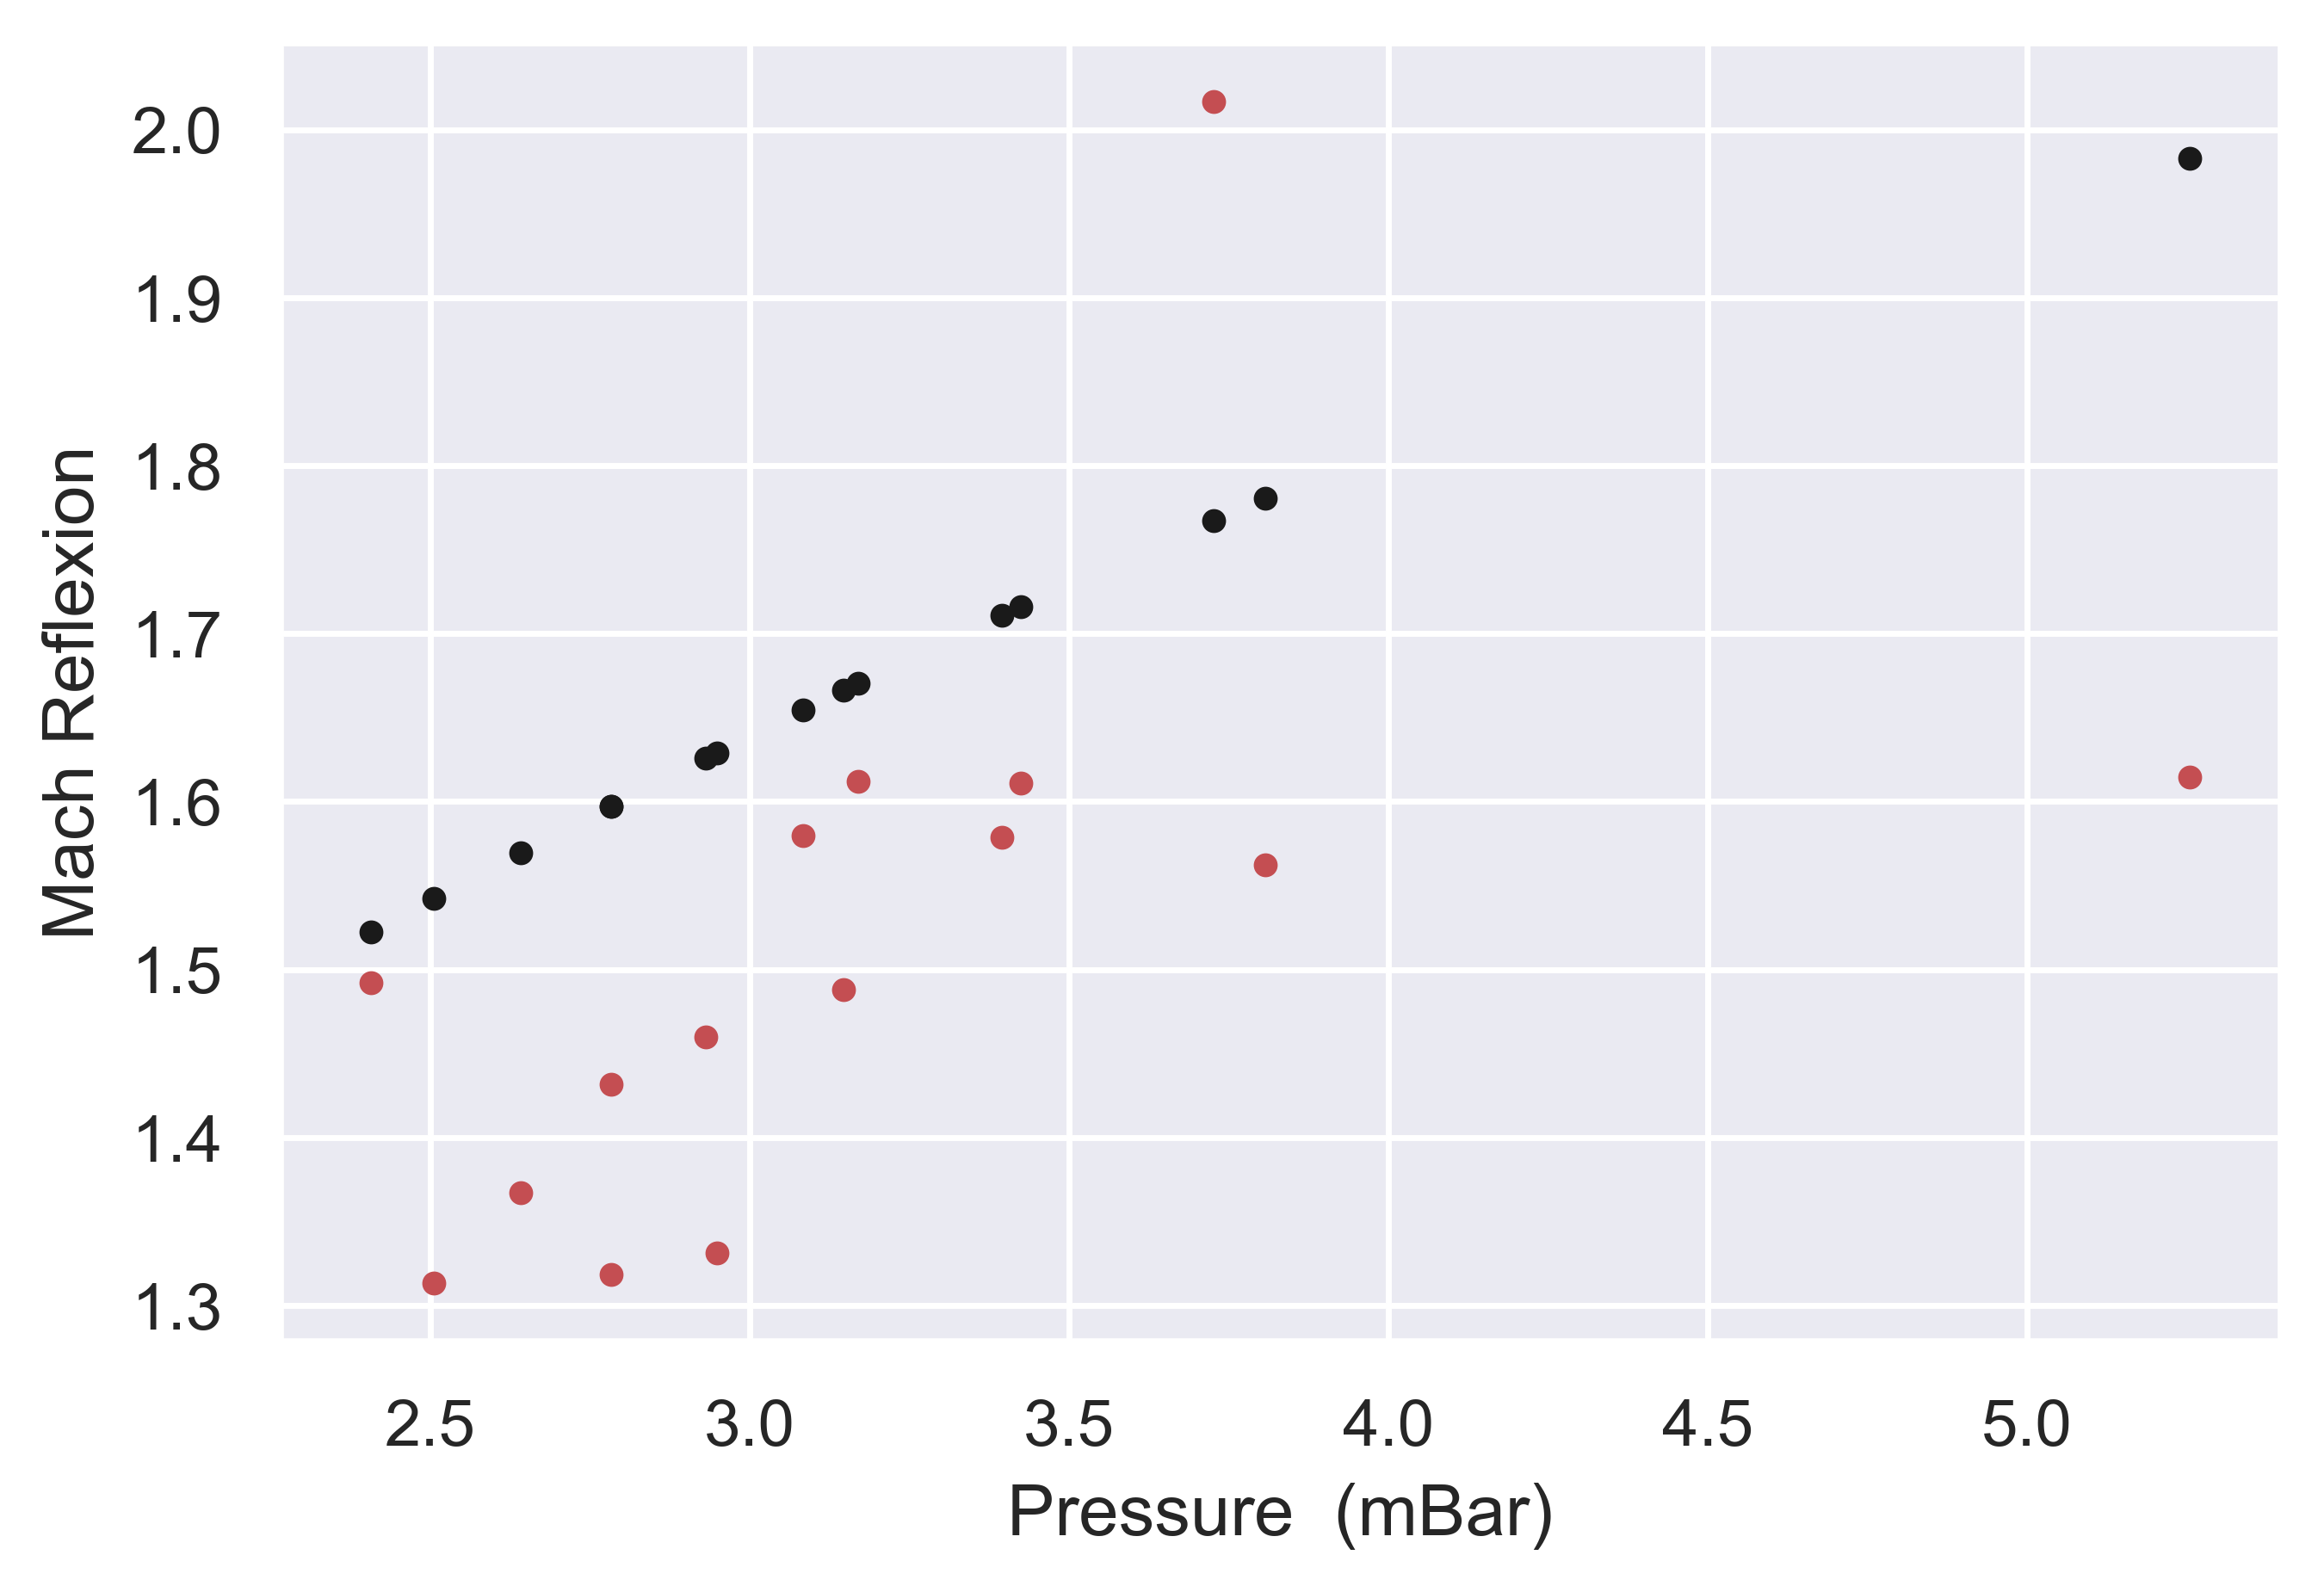

In [96]:
sns.set()
fig, ax=plt.subplots(dpi=500)

plt.plot(np.log(pressure_exp), Mr_exp, 'r.')
plt.plot(np.log(pressure_exp), Mr_exact, 'k.')
plt.xlabel('Pressure  (mBar)')
plt.ylabel('Mach Reflexion')